# **Story - 6 : What Is The State of Food Security and Nutrition in the US**




In [444]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# DATASET - Adults Meeting Fruit and Vegetable Intake Recommendations — USA, 2019

In [445]:
df = pd.read_html("https://www.cdc.gov/mmwr/volumes/71/wr/mm7101a1.htm?s_cid=mm7101a1_w")

**TABLE 1. State-specific median frequency of fruit and vegetable intake among adults aged ≥18 years and percentage of respondents meeting federal fruit and vegetable recommendations — Behavioral Risk Factor Surveillance System, 49 states* and District of Columbia, 2019**

In [446]:
# create column names
cols = ['state','sample_size','fruit_median_intake','vegetable_median_intake','fruit_perc_respondents','vegetable_perc_respondents']

In [447]:
fruit_vege_intake = df[0][1:]
fruit_vege_intake.columns = cols

In [448]:
fruit_vege_intake.head(2)

,state,sample_size,fruit_median_intake,vegetable_median_intake,fruit_perc_respondents,vegetable_perc_respondents
1,Alabama,4990,1.0,1.6,10.3 (8.7–12.0),6.7 (5.1–8.3)
2,Alaska,2138,1.0,1.7,12.2 (9.5–15.0),11.4 (8.8–14.0)


In [449]:
fruit_vege_intake.columns

Index(['state', 'sample_size', 'fruit_median_intake',
       'vegetable_median_intake', 'fruit_perc_respondents',
       'vegetable_perc_respondents'],
      dtype='object')

In [450]:
# check for missing values
fruit_vege_intake.isnull().sum()

state                         0
sample_size                   0
fruit_median_intake           0
vegetable_median_intake       0
fruit_perc_respondents        0
vegetable_perc_respondents    0
dtype: int64

In [451]:
#Split values to extract real values
fruit_vege_intake['fruit_perc_respondents'] = fruit_vege_intake['fruit_perc_respondents'].apply(lambda x: x.split('(')[0])
fruit_vege_intake['vegetable_perc_respondents'] = fruit_vege_intake['vegetable_perc_respondents'].apply(lambda x: x.split('(')[0])

In [452]:
# Select columns to be converted to floats with for loop
vars01 = ['sample_size', 'fruit_median_intake','vegetable_median_intake', 'fruit_perc_respondents','vegetable_perc_respondents']

In [453]:
# Convert variables to float
for column in vars01:
    fruit_vege_intake[column] = fruit_vege_intake[column].astype(float)

In [454]:
fruit_vege_intake.head(2)

,state,sample_size,fruit_median_intake,vegetable_median_intake,fruit_perc_respondents,vegetable_perc_respondents
1,Alabama,4990.0,1.0,1.6,10.3,6.7
2,Alaska,2138.0,1.0,1.7,12.2,11.4


**TABLE 2. State-specific percentage of respondents meeting federal fruit intake recommendations, by sex, age, race/ethnicity, and income-to-poverty ratio — Behavioral Risk Factor Surveillance System, 49 states* and District of Columbia, 2019**

In [455]:
fruit_intake = df[1]

In [456]:
# Create unique columns
cols2 = ['state','male_perc_fruit_intake','female_perc_fruit_intake','18_30_fruit_intake','31_50_fruit_intake','>51_fruit_intake','black_perc','hispanic_perc','white_perc','ipr<1pt25','ipr1.25_3.39','ipr>3.49']

In [457]:
fruit_intake.columns = cols2

In [458]:
fruit_intake.head(2)

,state,male_perc_fruit_intake,female_perc_fruit_intake,18_30_fruit_intake,31_50_fruit_intake,>51_fruit_intake,black_perc,hispanic_perc,white_perc,ipr<1pt25,ipr1.25_3.39,ipr>3.49
0,National,10.1§ (8.5–11.6),14.5 (13.1–15.8),10.2 (7.7–12.6),13.2 (11.4–14.9),12.6 (11.1–14.1),12.9 (11.1–14.7),16.4§ (14.4–18.5),11.1 (10.1–12.2),12.8 (11.2–14.4),10.9§ (9.6–12.3),12.9 (11.5–14.2)
1,Alabama,9.2 (6.6–11.7),11.4 (9.4–13.4),9.5 (4.9–14.2),11.9 (9.2–14.6),9.5 (7.6–11.4),12.9§ (9.7–16.0),17.3 (6.2–28.4),9.1 (7.5–10.7),12.0 (8.5–15.4),8.0§ (6.0–10.0),11.3 (9.1–13.5)


In [459]:
#Check for missing values
fruit_intake.isnull().sum()

state                       0
male_perc_fruit_intake      0
female_perc_fruit_intake    0
18_30_fruit_intake          0
31_50_fruit_intake          0
>51_fruit_intake            0
black_perc                  0
hispanic_perc               0
white_perc                  0
ipr<1pt25                   0
ipr1.25_3.39                0
ipr>3.49                    0
dtype: int64

In [460]:
#Split values to extract real values and convert them to floats
fruit_intake['male_perc_fruit_intake'] = fruit_intake['male_perc_fruit_intake'].apply(lambda x: x.split('(')[0]).str.replace('§','').astype(float)
fruit_intake['female_perc_fruit_intake'] = fruit_intake['female_perc_fruit_intake'].apply(lambda x: x.split('(')[0]).str.replace('§','').astype(float)
fruit_intake['18_30_fruit_intake'] = fruit_intake['18_30_fruit_intake'].apply(lambda x: x.split('(')[0]).str.strip().str.replace('§','').astype(float)
fruit_intake['31_50_fruit_intake'] = fruit_intake['31_50_fruit_intake'].apply(lambda x: x.split('(')[0]).str.strip().str.replace('§','').astype(float)
fruit_intake['>51_fruit_intake'] = fruit_intake['>51_fruit_intake'].apply(lambda x: x.split('(')[0]).str.strip().str.replace('§','').astype(float)

In [461]:
# Select the required columns
us_fruit_intake = fruit_intake[['state', 'male_perc_fruit_intake', 'female_perc_fruit_intake', '18_30_fruit_intake', '31_50_fruit_intake', '>51_fruit_intake']]

In [462]:
us_fruit_intake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   state                     51 non-null     object 
 1   male_perc_fruit_intake    51 non-null     float64
 2   female_perc_fruit_intake  51 non-null     float64
 3   18_30_fruit_intake        51 non-null     float64
 4   31_50_fruit_intake        51 non-null     float64
 5   >51_fruit_intake          51 non-null     float64
dtypes: float64(5), object(1)
memory usage: 2.5+ KB


In [463]:
us_fruit_intake.head(2)

,state,male_perc_fruit_intake,female_perc_fruit_intake,18_30_fruit_intake,31_50_fruit_intake,>51_fruit_intake
0,National,10.1,14.5,10.2,13.2,12.6
1,Alabama,9.2,11.4,9.5,11.9,9.5


**TABLE 3. State-specific percentage of respondents meeting federal vegetable intake recommendations by sex, age, race/ethnicity, and income-to-poverty ratio — Behavioral Risk Factor Surveillance System, 49 states* and District of Columbia, 2019**

In [464]:
vege_intake = df[2]

In [465]:
cols3 = ['state','male_perc_vege_intake','female_perc_vege_intake','18_30_vege_intake','31_50_vege_intake','>51_vege_intake','black_perc','hispanic_perc','white_perc','ipr<1pt25','ipr1.25_3.39','ipr>3.49']

In [466]:
vege_intake.columns = cols3

In [467]:
vege_intake = vege_intake[cols3]

In [468]:
vege_intake.head(2)

,state,male_perc_vege_intake,female_perc_vege_intake,18_30_vege_intake,31_50_vege_intake,>51_vege_intake,black_perc,hispanic_perc,white_perc,ipr<1pt25,ipr1.25_3.39,ipr>3.49
0,National,7.6§ (5.8–9.4),12.4 (10.6–14.3),7.1§ (5.0–9.3),8.7 (6.5–10.8),12.5 (10.3–14.6),6.9§ (5.2–8.6),11.0 (9.3–12.6),10.1 (8.4–11.8),6.8§ (5.0–8.5),7.7§ (5.9–9.4),12.2 (10.5–14.0)
1,Alabama,5.6 (3.5–7.7),7.7 (5.6–9.8),5.3 (3.0–7.5),6.2 (4.0–8.5),7.6 (5.4–9.9),5.0 (1.7–8.3),10.5 (7.2–13.8),7.1 (3.8–10.4),4.4§ (2.0–6.8),4.3§ (1.9–6.6),9.4 (7.0–11.7)


In [469]:
# Check for missing values
vege_intake.isnull().sum()

state                      0
male_perc_vege_intake      0
female_perc_vege_intake    0
18_30_vege_intake          0
31_50_vege_intake          0
>51_vege_intake            0
black_perc                 0
hispanic_perc              0
white_perc                 0
ipr<1pt25                  0
ipr1.25_3.39               0
ipr>3.49                   0
dtype: int64

In [470]:
#Split values to extract real values and convert them to floats
vege_intake['male_perc_vege_intake'] = vege_intake['male_perc_vege_intake'].apply(lambda x: x.split('(')[0]).str.replace('§','').astype(float)
vege_intake['female_perc_vege_intake'] = vege_intake['female_perc_vege_intake'].apply(lambda x: x.split('(')[0]).str.replace('§','').astype(float)
vege_intake['18_30_vege_intake'] = vege_intake['18_30_vege_intake'].apply(lambda x: x.split('(')[0]).str.strip().str.replace('§','').astype(float)
vege_intake['31_50_vege_intake'] = vege_intake['31_50_vege_intake'].apply(lambda x: x.split('(')[0]).str.strip().str.replace('§','').astype(float)
vege_intake['>51_vege_intake'] = vege_intake['>51_vege_intake'].apply(lambda x: x.split('(')[0]).str.strip().str.replace('§','').astype(float)

In [471]:
# Select required columns
us_vege_intake = vege_intake[['state', 'male_perc_vege_intake', 'female_perc_vege_intake', '18_30_vege_intake', '31_50_vege_intake', '>51_vege_intake']]

In [472]:
us_vege_intake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   state                    51 non-null     object 
 1   male_perc_vege_intake    51 non-null     float64
 2   female_perc_vege_intake  51 non-null     float64
 3   18_30_vege_intake        51 non-null     float64
 4   31_50_vege_intake        51 non-null     float64
 5   >51_vege_intake          51 non-null     float64
dtypes: float64(5), object(1)
memory usage: 2.5+ KB


In [473]:
us_vege_intake.head(2)

,state,male_perc_vege_intake,female_perc_vege_intake,18_30_vege_intake,31_50_vege_intake,>51_vege_intake
0,National,7.6,12.4,7.1,8.7,12.5
1,Alabama,5.6,7.7,5.3,6.2,7.6


# Merge all dataset on fruit and vegetable intake

In [474]:
result = pd.merge(us_vege_intake, us_fruit_intake,on='state', how='inner')

In [475]:
all_fruit_vege = fruit_vege_intake.merge(result,on='state', how='inner')

In [476]:
all_fruit_vege.head(2)

,state,sample_size,fruit_median_intake,vegetable_median_intake,fruit_perc_respondents,vegetable_perc_respondents,male_perc_vege_intake,female_perc_vege_intake,18_30_vege_intake,31_50_vege_intake,>51_vege_intake,male_perc_fruit_intake,female_perc_fruit_intake,18_30_fruit_intake,31_50_fruit_intake,>51_fruit_intake
0,Alabama,4990.0,1.0,1.6,10.3,6.7,5.6,7.7,5.3,6.2,7.6,9.2,11.4,9.5,11.9,9.5
1,Alaska,2138.0,1.0,1.7,12.2,11.4,9.6,13.5,10.3,8.7,14.6,9.5,15.4,13.6,10.9,12.9


In [477]:
#Export Dataset to google drive
# path = '/content/drive/MyDrive/DATA 608/Assignment 6/vege_intake_orig.csv'
# with open(path, 'w', encoding = 'utf-8-sig') as f:
#   vege_intake.to_csv(f,index=False)


**US States Average Poverty Dataset**

In [478]:
df_poverty = pd.read_csv('https://raw.githubusercontent.com/nnaemeka-git/global-datasets/main/poverty_by_state.csv')

In [479]:
df_poverty.head(2)

,Geographic Information,Unnamed: 1,Unnamed: 2,All Ages,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Age 0-17,...,Unnamed: 20,Median Household Income,Unnamed: 22,Unnamed: 23,Age 0-4,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29
0,State FIPS Code,Postal Code,Name,"Poverty Estimate, All Ages",90% CI Lower Bound,90% CI Upper Bound,"Poverty Percent, All Ages",90% CI Lower Bound,90% CI Upper Bound,"Poverty Estimate, Age 0-17",...,90% CI Upper Bound,Median Household Income,90% CI Lower Bound,90% CI Upper Bound,"Poverty Estimate, Age 0-4",90% CI Lower Bound,90% CI Upper Bound,"Poverty Percent, Age 0-4",90% CI Lower Bound,90% CI Upper Bound
1,0,US,United States,48810868,48554692,49067044,15.8,15.7,15.9,16086960,...,21,52250,52185,52315,4811689,4759374,4864004,24.8,24.5,25.1


In [480]:
df_poverty.columns = df_poverty.iloc[0]

In [481]:
# create unique column names
cols4 = ['Postal Code','Name','Poverty Percent, All Ages','Poverty Percent, Age 0-17','Poverty Percent, Age 5-17 in Families','Poverty Percent, Age 0-4']

In [482]:
us_poverty = df_poverty[cols4][1:]
us_poverty.head(2)

,Postal Code,Name,"Poverty Percent, All Ages","Poverty Percent, Age 0-17","Poverty Percent, Age 5-17 in Families","Poverty Percent, Age 0-4"
1,US,United States,15.8,22.2,20.8,24.8
2,AL,Alabama,18.9,27.4,25.6,31.6


In [483]:
us_poverty.columns

Index(['Postal Code', 'Name', 'Poverty Percent, All Ages',
       'Poverty Percent, Age 0-17', 'Poverty Percent, Age 5-17 in Families',
       'Poverty Percent, Age 0-4'],
      dtype='object', name=0)

In [484]:
# Rename column names
us_poverty.rename(columns = {'Postal Code':'state_code','Name':'state','Poverty Percent, All Ages':'poverty_percent_all_ages','Poverty Percent, Age 0-17':'poverty_percent_age_0_17',
                             'Poverty Percent, Age 5-17 in Families':'poverty_percent_age_5_17_in_families',
                             'Poverty Percent, Age 0-4':'poverty_percent_age_0_4'}, inplace = True)

In [485]:
us_poverty.head(2)

,state_code,state,poverty_percent_all_ages,poverty_percent_age_0_17,poverty_percent_age_5_17_in_families,poverty_percent_age_0_4
1,US,United States,15.8,22.2,20.8,24.8
2,AL,Alabama,18.9,27.4,25.6,31.6


In [486]:
# Columns to be converted to float
vars = ['poverty_percent_all_ages','poverty_percent_age_0_17', 'poverty_percent_age_5_17_in_families','poverty_percent_age_0_4']

In [487]:
# Convert multiple columns to float with for loop
for column in vars:
    us_poverty[column] = us_poverty[column].astype(float)

In [488]:
us_poverty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 1 to 52
Data columns (total 6 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   state_code                            52 non-null     object 
 1   state                                 52 non-null     object 
 2   poverty_percent_all_ages              52 non-null     float64
 3   poverty_percent_age_0_17              52 non-null     float64
 4   poverty_percent_age_5_17_in_families  52 non-null     float64
 5   poverty_percent_age_0_4               52 non-null     float64
dtypes: float64(4), object(2)
memory usage: 2.6+ KB


In [489]:
us_poverty.head(2)

,state_code,state,poverty_percent_all_ages,poverty_percent_age_0_17,poverty_percent_age_5_17_in_families,poverty_percent_age_0_4
1,US,United States,15.8,22.2,20.8,24.8
2,AL,Alabama,18.9,27.4,25.6,31.6


**US States Average Food Insecurity and Nutrition Dataset**

In [490]:
df_food_nutiri = pd.read_csv('https://raw.githubusercontent.com/nnaemeka-git/global-datasets/main/addtl%20measure%20data.csv')

In [491]:
df_food_nutiri.head(2)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Life Expectancy,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 278,% Non-Hispanic White,Unnamed: 280,% Not Proficient in English,Unnamed: 282,Unnamed: 283,Unnamed: 284,% Female,% Rural,Unnamed: 287
0,FIPS,State,County,Life Expectancy,95% CI - Low,95% CI - High,Life Expectancy (AIAN),Life Expectancy (AIAN) 95% CI - Low,Life Expectancy (AIAN) 95% CI - High,Life Expectancy (Asian),...,% Hispanic,# Non-Hispanic White,% Non-Hispanic White,# Not Proficient in English,% Not Proficient in English,95% CI - Low,95% CI - High,% Female,# Rural Residents,% Rural
1,1000,Alabama,NaN,74.8,74.8,74.9,111.8,99.3,124.3,87.3,...,4.8,3269726,64.9,48318,1,1,1,51.4,1957932,41


In [492]:
df_food_nutiri.columns = df_food_nutiri.iloc[0]

In [493]:
df_food_nutiri.columns

Index(['FIPS', 'State', 'County', 'Life Expectancy', '95% CI - Low',
       '95% CI - High', 'Life Expectancy (AIAN)',
       'Life Expectancy (AIAN) 95% CI - Low',
       'Life Expectancy (AIAN) 95% CI - High', 'Life Expectancy (Asian)',
       ...
       '% Hispanic', '# Non-Hispanic White', '% Non-Hispanic White',
       '# Not Proficient in English', '% Not Proficient in English',
       '95% CI - Low', '95% CI - High', '% Female', '# Rural Residents',
       '% Rural'],
      dtype='object', name=0, length=288)

In [494]:
# Select required columns
cols6 = ['State','County','% Limited Access to Healthy Foods','% Food Insecure']

In [495]:
us_food_nutiri = df_food_nutiri[cols6][1:]

In [496]:
# Checking for missing values
us_food_nutiri.isnull().sum()

0
State                                 0
County                               51
% Limited Access to Healthy Foods    33
% Food Insecure                       0
dtype: int64

In [497]:
us_food_nutiri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3193 entries, 1 to 3193
Data columns (total 4 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   State                              3193 non-null   object
 1   County                             3142 non-null   object
 2   % Limited Access to Healthy Foods  3160 non-null   object
 3   % Food Insecure                    3193 non-null   object
dtypes: object(4)
memory usage: 99.9+ KB


In [498]:
# Drop missing values
us_food_nutiri.dropna(subset=['County','% Limited Access to Healthy Foods','% Food Insecure'], inplace=True)

In [499]:
# Rename columns
us_food_nutiri.rename(columns = {'State':'state','% Limited Access to Healthy Foods':'Nutrition','% Food Insecure':'perc_food_insecurity'}, inplace = True)

In [500]:
# Convert Nutrition column to float
us_food_nutiri['Nutrition'] = us_food_nutiri['Nutrition'].astype('float')
us_food_nutiri['perc_food_insecurity'] = us_food_nutiri['perc_food_insecurity'].astype('float')

In [501]:
us_food_nutiri.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3109 entries, 2 to 3193
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   state                 3109 non-null   object 
 1   County                3109 non-null   object 
 2   Nutrition             3109 non-null   float64
 3   perc_food_insecurity  3109 non-null   float64
dtypes: float64(2), object(2)
memory usage: 121.4+ KB


In [502]:
# Find average by state
us_food_nutiri01 = us_food_nutiri.groupby('state')['Nutrition'].mean().to_frame().reset_index()
us_food_insecu = us_food_nutiri.groupby('state')['perc_food_insecurity'].mean().to_frame().reset_index()
us_food_nutiri01.head(2),us_food_insecu.head(2)

(     state  Nutrition
 0  Alabama   8.893939
 1   Alaska  14.250000,
      state  perc_food_insecurity
 0  Alabama             16.136364
 1   Alaska             13.035714)

In [503]:
# Merge US Poverty data with US Nutrition data
result02 = pd.merge(all_fruit_vege, us_food_nutiri01, on='state', how='inner')

In [504]:
result03 = pd.merge(result02, us_food_insecu, on='state', how='inner')

In [505]:
result03.head()

,state,sample_size,fruit_median_intake,vegetable_median_intake,fruit_perc_respondents,vegetable_perc_respondents,male_perc_vege_intake,female_perc_vege_intake,18_30_vege_intake,31_50_vege_intake,>51_vege_intake,male_perc_fruit_intake,female_perc_fruit_intake,18_30_fruit_intake,31_50_fruit_intake,>51_fruit_intake,Nutrition,perc_food_insecurity
0,Alabama,4990.0,1.0,1.6,10.3,6.7,5.6,7.7,5.3,6.2,7.6,9.2,11.4,9.5,11.9,9.5,8.893939,16.136364
1,Alaska,2138.0,1.0,1.7,12.2,11.4,9.6,13.5,10.3,8.7,14.6,9.5,15.4,13.6,10.9,12.9,14.250000,13.035714
2,Arizona,6149.0,1.0,1.6,14.8,12.8,10.4,15.2,11.2,11.6,14.3,12.7,16.8,13.8,15.6,14.5,16.400000,14.866667
3,Arkansas,3571.0,1.0,1.6,11.6,10.8,9.0,12.6,10.6,9.5,12.0,10.7,12.5,10.3,12.0,12.0,11.306667,16.480000
4,California,8894.0,1.0,1.6,13.6,11.3,7.9,14.7,7.9,9.7,14.7,11.3,15.8,9.5,15.1,14.5,6.155172,11.741379


# Merge Dataset From Different Sources Into One

In [506]:
# Merge All dataset
all_ds = us_poverty.merge(result03,on='state', how='inner')

In [507]:
all_ds.head(2)

,state_code,state,poverty_percent_all_ages,poverty_percent_age_0_17,poverty_percent_age_5_17_in_families,poverty_percent_age_0_4,sample_size,fruit_median_intake,vegetable_median_intake,fruit_perc_respondents,...,18_30_vege_intake,31_50_vege_intake,>51_vege_intake,male_perc_fruit_intake,female_perc_fruit_intake,18_30_fruit_intake,31_50_fruit_intake,>51_fruit_intake,Nutrition,perc_food_insecurity
0,AL,Alabama,18.9,27.4,25.6,31.6,4990.0,1.0,1.6,10.3,...,5.3,6.2,7.6,9.2,11.4,9.5,11.9,9.5,8.893939,16.136364
1,AK,Alaska,10.1,13.6,12.5,14.9,2138.0,1.0,1.7,12.2,...,10.3,8.7,14.6,9.5,15.4,13.6,10.9,12.9,14.250000,13.035714


In [508]:
all_ds.shape

(50, 23)

In [509]:
#Export Dataset to google drive
# path = '/content/drive/MyDrive/DATA 608/Assignment 6/food_insec_nutrition.csv'
# with open(path, 'w', encoding = 'utf-8-sig') as f:
#   all_ds.to_csv(f,index=False)


# Using Scatter Plot And Trend Line to Determine Relationship

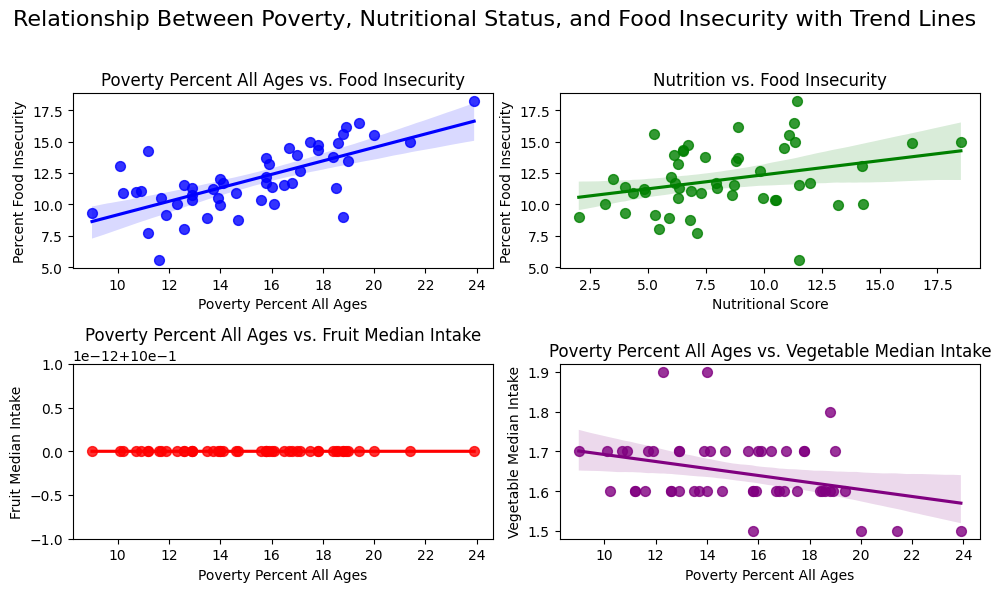

In [519]:
from seaborn import regplot

# Setting up the figure layout again
fig, axes = plt.subplots(2, 2, figsize=(10,6))
fig.suptitle('Relationship Between Poverty, Nutritional Status, and Food Insecurity with Trend Lines', fontsize=16)

# Scatter plot with trend line: Poverty Percent All Ages vs. Food Insecurity
regplot(ax=axes[0, 0], data=all_ds, x='poverty_percent_all_ages', y='perc_food_insecurity', color='blue', scatter_kws={'s': 50})
axes[0, 0].set_title('Poverty Percent All Ages vs. Food Insecurity')
axes[0, 0].set_xlabel('Poverty Percent All Ages')
axes[0, 0].set_ylabel('Percent Food Insecurity')

# Scatter plot with trend line: Nutrition vs. Food Insecurity
regplot(ax=axes[0, 1], data=all_ds, x='Nutrition', y='perc_food_insecurity', color='green', scatter_kws={'s': 50})
axes[0, 1].set_title('Nutrition vs. Food Insecurity')
axes[0, 1].set_xlabel('Nutritional Score')
axes[0, 1].set_ylabel('Percent Food Insecurity')

# Scatter plot with trend line: Poverty Percent All Ages vs. Fruit Median Intake
regplot(ax=axes[1, 0], data=all_ds, x='poverty_percent_all_ages', y='fruit_median_intake', color='red', scatter_kws={'s': 50})
axes[1, 0].set_title('Poverty Percent All Ages vs. Fruit Median Intake')
axes[1, 0].set_xlabel('Poverty Percent All Ages')
axes[1, 0].set_ylabel('Fruit Median Intake')

# Scatter plot with trend line: Poverty Percent All Ages vs. Vegetable Median Intake
regplot(ax=axes[1, 1], data=all_ds, x='poverty_percent_all_ages', y='vegetable_median_intake', color='purple', scatter_kws={'s': 50})
axes[1, 1].set_title('Poverty Percent All Ages vs. Vegetable Median Intake')
axes[1, 1].set_xlabel('Poverty Percent All Ages')
axes[1, 1].set_ylabel('Vegetable Median Intake')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


# Using Correlation Matrix to Determine Correlation Between Indicators

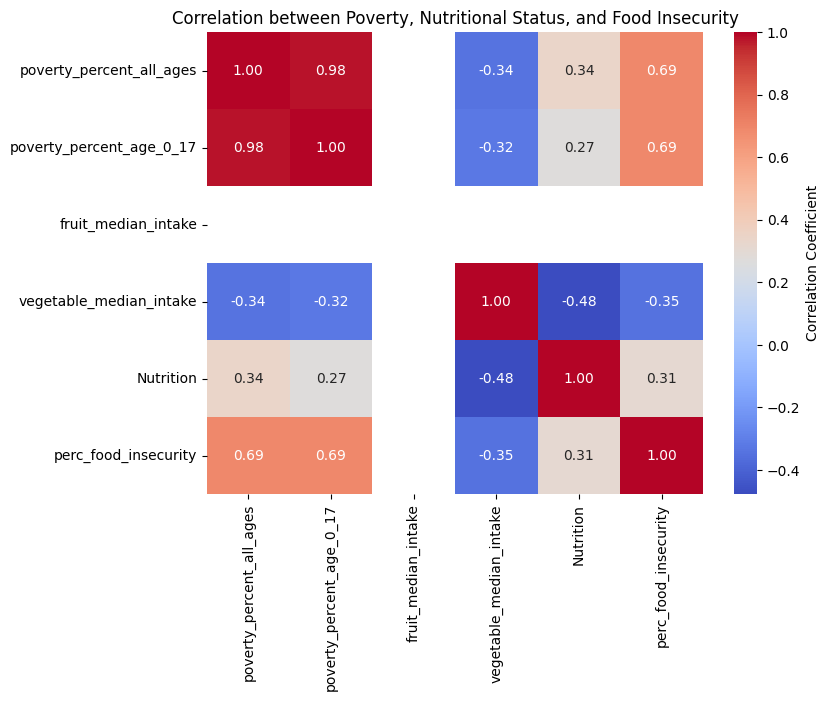

In [518]:
# Select relevant columns for correlation analysis
relevant_columns = [
    'poverty_percent_all_ages', 'poverty_percent_age_0_17',
    'fruit_median_intake', 'vegetable_median_intake', 'Nutrition',
    'perc_food_insecurity'
]

# Compute the correlation matrix
correlation_matrix = all_ds[relevant_columns].corr()

# Plot the heatmap of the correlation matrix
plt.figure(figsize=(8,6))
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation between Poverty, Nutritional Status, and Food Insecurity')
plt.show()